In [20]:
from skimage.filters import gabor_kernel
from skimage.transform import resize
from matplotlib import pyplot as plt
import numpy as np
import scipy.optimize as optimize

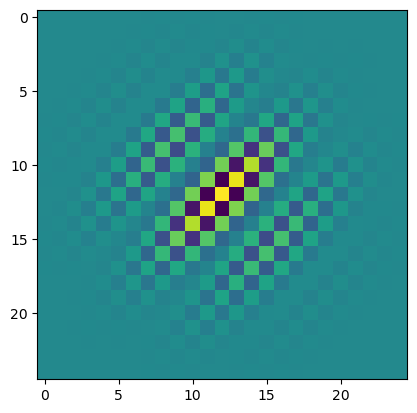

In [45]:
example_image = gabor_kernel(0.8, theta=np.pi/4, sigma_x=4, sigma_y=4, n_stds=4)#gaussian#np.random.random((24,24)) #
plt.imshow(example_image.real)

In [201]:
fitted_gabor = fit_gabor_filter(example_image)

/gpfs01/berens/user/fseel/miniconda3/envs/receptive-fields/lib/python3.11/site-packages/scipy/optimize/_optimize.py:899: ComplexWarning: Casting complex values to real discards the imaginary part
  fsim[k] = func(sim[k])
/gpfs01/berens/user/fseel/miniconda3/envs/receptive-fields/lib/python3.11/site-packages/scipy/optimize/_optimize.py:935: ComplexWarning: Casting complex values to real discards the imaginary part
  fsim[-1] = fxe
/gpfs01/berens/user/fseel/miniconda3/envs/receptive-fields/lib/python3.11/site-packages/scipy/optimize/_optimize.py:942: ComplexWarning: Casting complex values to real discards the imaginary part
  fsim[-1] = fxr
/gpfs01/berens/user/fseel/miniconda3/envs/receptive-fields/lib/python3.11/site-packages/scipy/optimize/_optimize.py:938: ComplexWarning: Casting complex values to real discards the imaginary part
  fsim[-1] = fxr
/gpfs01/berens/user/fseel/miniconda3/envs/receptive-fields/lib/python3.11/site-packages/scipy/optimize/_optimize.py:953: ComplexWarning: Cas

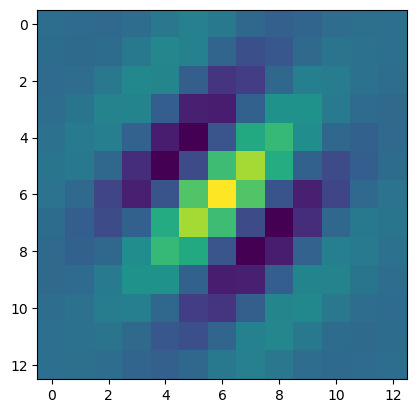

In [203]:
reproduced = gabor_kernel(*fitted_gabor.x)

plt.imshow(resize(reproduced.real, example_image.shape))

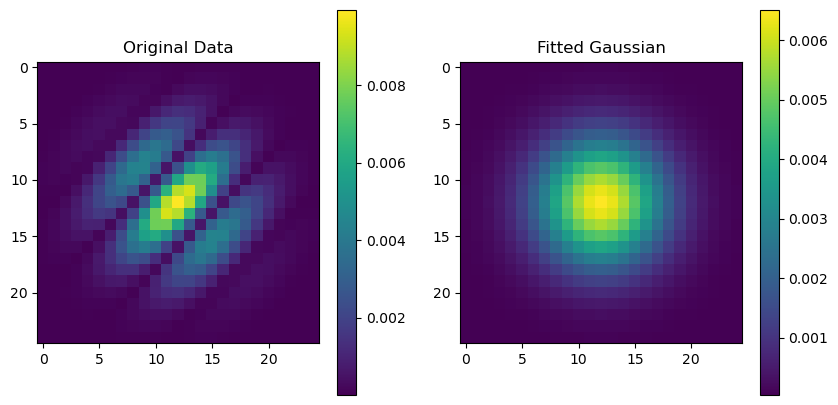

Fitted Amplitude: 0.006466429280444919
Fitted xo: 12.500000000072712
Fitted yo: 12.500000001024214
Fitted Sigma_x: 4.045230559817672
Fitted Sigma_y: 4.0452305574495115
Fitted Offset: 3.747934042058645e-05


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the 2D Gaussian function
def gaussian_2d(xy, amplitude, xo, yo, sigma_x, sigma_y, offset):
    x, y = xy
    exp_term = -((x - xo) ** 2 / (2 * sigma_x ** 2) + (y - yo) ** 2 / (2 * sigma_y ** 2))
    return amplitude * np.exp(exp_term) + offset

# Generate example data
x, y = np.meshgrid(np.linspace(0,example_image.shape[0], example_image.shape[0]), np.linspace(0,example_image.shape[1], example_image.shape[1]))
data = np.abs(example_image.real)

# Initial guess for the parameters
amplitude=1
xo= example_image.shape[0]//2
yo= example_image.shape[1]//2
sigma_x = 2
sigma_y=2
offset=0
initial_guess = (amplitude, xo, yo, sigma_x, sigma_y, offset)

# Fit the 2D Gaussian to the data
params, covariance = curve_fit(gaussian_2d, (x.ravel(), y.ravel()), data.ravel(), p0=initial_guess)

# Extract the fitted parameters
amplitude, xo, yo, sigma_x, sigma_y, offset = params

# Create the fitted Gaussian
fit_gaussian = gaussian_2d((x, y), amplitude, xo, yo, sigma_x, sigma_y, offset)

# Display the original data and the fitted Gaussian
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(data, cmap='viridis')
plt.colorbar()
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.imshow(fit_gaussian, cmap='viridis')
plt.colorbar()
plt.title('Fitted Gaussian')

plt.show()

# Display the fitted parameters
print(f"Fitted Amplitude: {amplitude}")
print(f"Fitted xo: {xo}")
print(f"Fitted yo: {yo}")
print(f"Fitted Sigma_x: {sigma_x}")
print(f"Fitted Sigma_y: {sigma_y}")
print(f"Fitted Offset: {offset}")